### Importaciones y lecturas

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfAll = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/dfAll.csv')

df_clientes_malos = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUSm/dfm_clientes_malos.csv')
df_clientes_regulares = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUSm/dfm_clientes_regulares.csv')
df_clientes_vip = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUSm/dfm_clientes_vip.csv')

In [3]:
df_clientes_malos.shape , df_clientes_regulares.shape , df_clientes_vip.shape

((1503, 18), (12286, 18), (6909, 18))

### Limpieza data frame clientes malo, regular y vip

In [4]:
df_clientes_malos.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5018501,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,5038807,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0


### Correlación

#### Primer correlación

In [5]:
# Se elimina ID en la correlacion para evitar valores incongruentes 

# dfAll_m = dfAll_m.dropna()

df_clientes_malos = df_clientes_malos.drop(['ID'], axis = 1)
df_clientes_regulares = df_clientes_regulares.drop(['ID'], axis = 1)
df_clientes_vip = df_clientes_vip.drop(['ID'], axis = 1)

# Se eliminan valores vacíos en 

df_clientes_malos = df_clientes_malos.dropna()
df_clientes_regulares = df_clientes_regulares.dropna()
df_clientes_vip = df_clientes_vip.dropna()

df_clientes_malos_str = df_clientes_malos
df_clientes_regulares_str = df_clientes_regulares
df_clientes_vip_str = df_clientes_vip

In [6]:
df_clientes_malos

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0
3,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.14,5.89,1,1,0,0,Managers,2.0
4,F,N,Y,1,157500.0,State servant,Higher education,Married,House / apartment,42.86,11.73,1,0,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,M,Y,Y,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,24.52,0.63,1,0,1,0,Sales staff,2.0
1498,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,46.74,1.27,1,0,0,0,Laborers,2.0
1499,F,Y,Y,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,38.72,10.44,1,0,0,0,Sales staff,2.0
1500,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,32.38,3.21,1,0,0,1,Security staff,2.0


In [7]:
# Se hace la primer correlación
# Se eliminan automáticamente valores con string

s_clientes_malos = df_clientes_malos.corr()
s_clientes_regulares = df_clientes_regulares.corr()
s_clientes_vip = df_clientes_vip.corr()

In [8]:
s_clientes_malos

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,-0.028398,-0.171065,-0.053053,NaN,-0.017742,0.031643,-0.037543,0.909897
AMT_INCOME_TOTAL,-0.028398,1.000000,0.054478,0.047124,NaN,-0.121883,0.013104,0.116681,-0.059520
YEARS_BIRTH,-0.171065,0.054478,1.000000,0.384225,NaN,-0.035565,0.009394,-0.141727,-0.134019
YEARS_EMPLOYED,-0.053053,0.047124,0.384225,1.000000,NaN,0.036934,0.046791,-0.065225,-0.026628
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.017742,-0.121883,-0.035565,0.036934,NaN,1.000000,0.340228,-0.100390,0.008073
FLAG_PHONE,0.031643,0.013104,0.009394,0.046791,NaN,0.340228,1.000000,0.000475,0.026052
FLAG_EMAIL,-0.037543,0.116681,-0.141727,-0.065225,NaN,-0.100390,0.000475,1.000000,-0.043853
CNT_FAM_MEMBERS,0.909897,-0.059520,-0.134019,-0.026628,NaN,0.008073,0.026052,-0.043853,1.000000


In [9]:
# Se elimina Flag Mobil por inconsistencia

df_clientes_malos_1 = df_clientes_malos.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_regulares_1 = df_clientes_regulares.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_vip_1 = df_clientes_vip.drop(['FLAG_MOBIL'], axis = 1)

s_clientes_malos_1 = df_clientes_malos_1.corr()
s_clientes_regulares_1 = df_clientes_regulares_1.corr()
s_clientes_vip_1 = df_clientes_vip_1.corr()

In [10]:
s_clientes_malos_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,-0.028398,-0.171065,-0.053053,-0.017742,0.031643,-0.037543,0.909897
AMT_INCOME_TOTAL,-0.028398,1.000000,0.054478,0.047124,-0.121883,0.013104,0.116681,-0.059520
YEARS_BIRTH,-0.171065,0.054478,1.000000,0.384225,-0.035565,0.009394,-0.141727,-0.134019
YEARS_EMPLOYED,-0.053053,0.047124,0.384225,1.000000,0.036934,0.046791,-0.065225,-0.026628
FLAG_WORK_PHONE,-0.017742,-0.121883,-0.035565,0.036934,1.000000,0.340228,-0.100390,0.008073
FLAG_PHONE,0.031643,0.013104,0.009394,0.046791,0.340228,1.000000,0.000475,0.026052
FLAG_EMAIL,-0.037543,0.116681,-0.141727,-0.065225,-0.100390,0.000475,1.000000,-0.043853
CNT_FAM_MEMBERS,0.909897,-0.059520,-0.134019,-0.026628,0.008073,0.026052,-0.043853,1.000000


Text(0.5, 1.0, 'Clientes_malos')

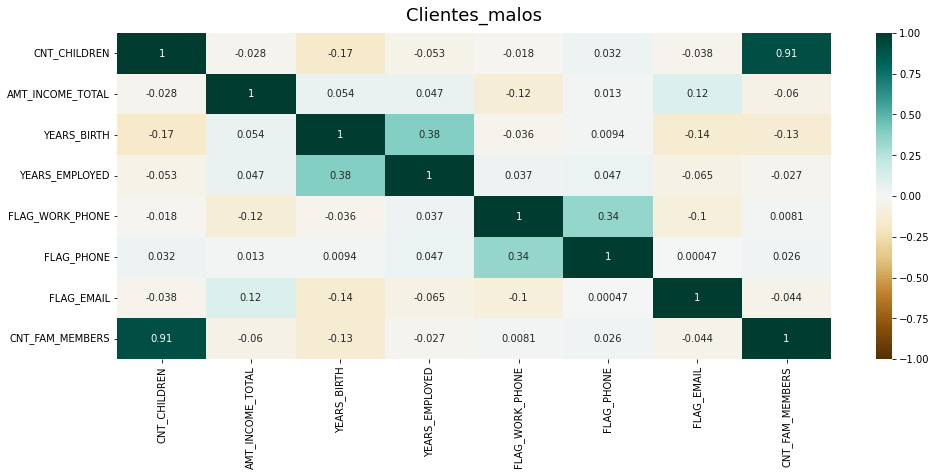

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(s_clientes_malos_1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12)

# plt.savefig('Mobil_Clientes_malos.png', dpi=300, bbox_inches='tight')
# pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Mobil_Clientes_malos.png'
# pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Mobil_Clientes_malos.png'

# shutil.move(pos1,pos2)

#### Gráficas correlación

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Clientes_malos_2.png'

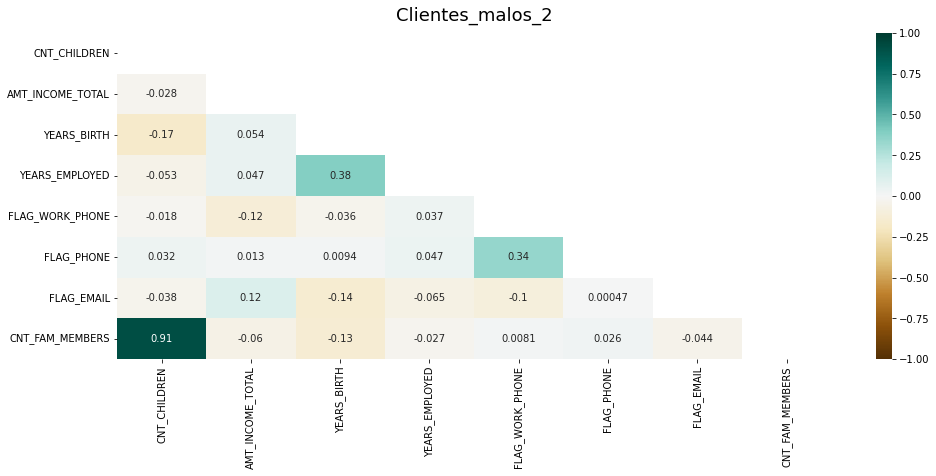

In [12]:
# Gráfica de clientes malos

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_malos_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_malos_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos_2', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_malos_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Clientes_malos_2.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Clientes_VIP_2.png'

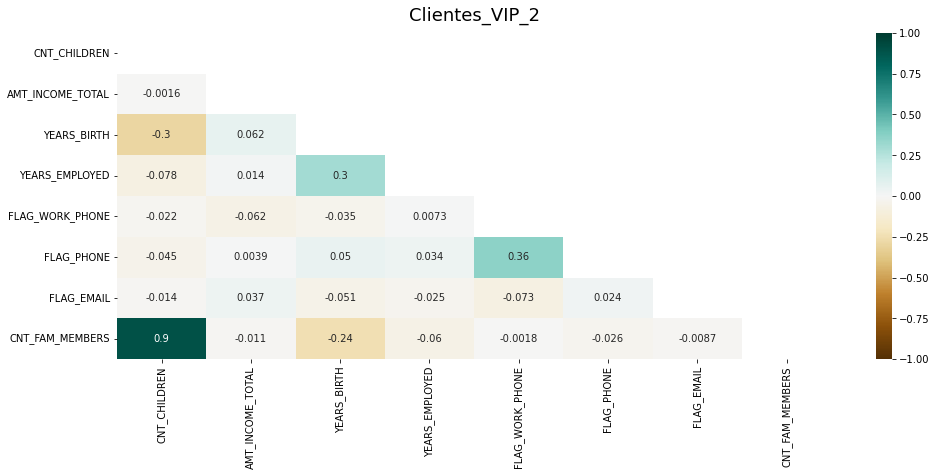

In [13]:
# Gráfica de clientes vip

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_vip_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_vip_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_VIP_2', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_VIP_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Clientes_VIP_2.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Clientes_regulares_2.png'

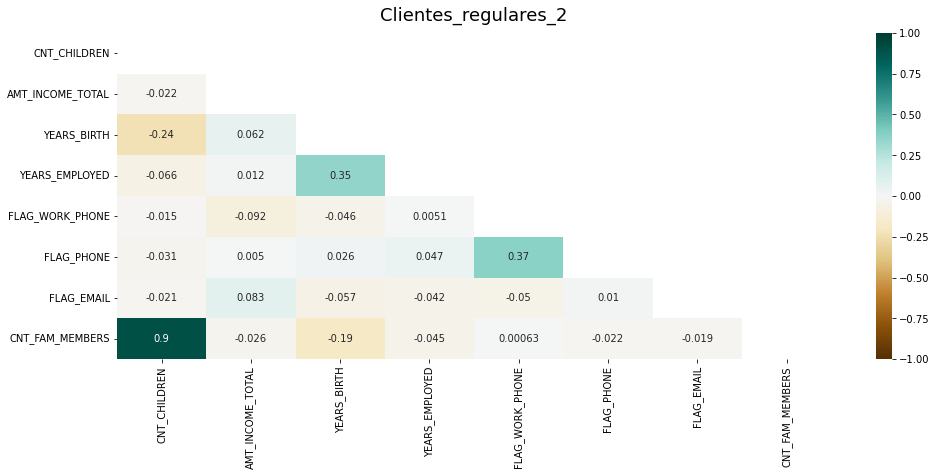

In [14]:
# Gráfica de clientes regulares

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_regulares_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_regulares_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_regulares_2', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_regulares_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Clientes_regulares_2.png'
shutil.move(pos1,pos2)


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Correlación_AMT_INCOME_TOTAL_VIP_2.png'

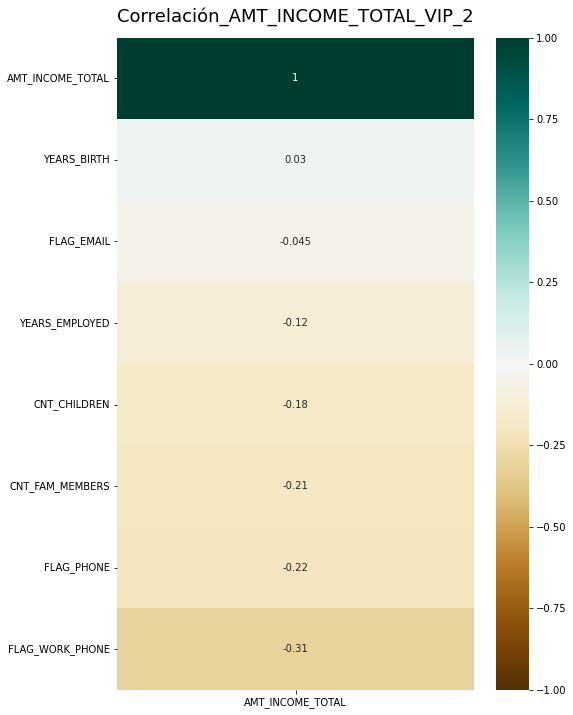

In [15]:
# Correlación por ingresos sin strings

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_vip_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación_AMT_INCOME_TOTAL_VIP_2', fontdict={'fontsize':18}, pad=16)

plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Correlación_AMT_INCOME_TOTAL_VIP_2.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Correlación_AMT_INCOME_TOTAL_malos_2.png'

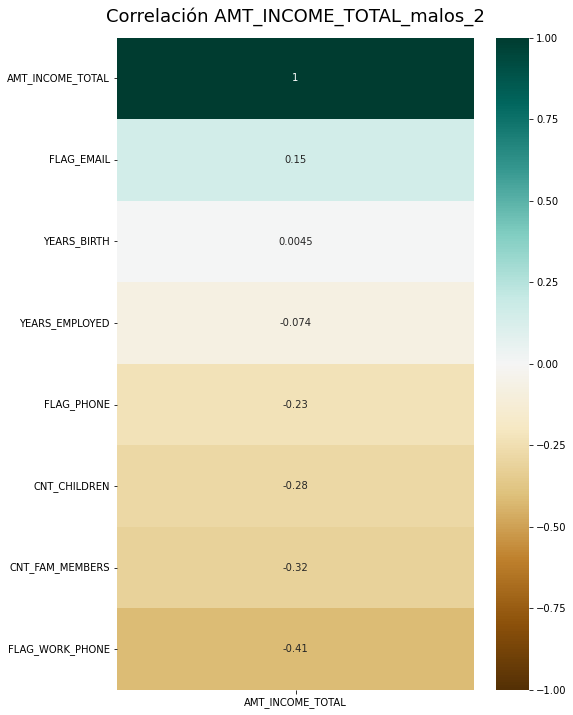

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_malos_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos_2', fontdict={'fontsize':18}, pad=16);

plt.savefig('Correlación_AMT_INCOME_TOTAL_malos_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_malos_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr_2/Correlación_AMT_INCOME_TOTAL_malos_2.png'
shutil.move(pos1,pos2)